In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [14]:
# Get sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.
target_user = ("BBC", "CBS", "CNN", "FOXNEWS", "NYTIMES")    

# initialize sentiment score for each news outlet
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# initialize other LISTs
tweetAccount_list = []
tweetText_list = []
tweetCreated_list = []
tweets_ago_list = []
org_list = []

for user in target_user:
    counter = 1
    print ("Organization: " + user)
    
    # pull 100 tweets from each new outlet
    # loop through 5 times, since each call brings back 20 tweets
    for x in range(1, 6):
        #print ('x: ' + str(x))
       
        public_tweets = api.user_timeline(user, page=x)
        print (x)
        
        for tweet in public_tweets:
            #print(tweet["text"])
            #print('counter: ' + str(counter))
            
            results = analyzer.polarity_scores(tweet["text"])
            tweetText_list.append(tweet["text"])
            tweetAccount_list.append(tweet["user"]["name"])
            tweetCreated_list.append(tweet["created_at"])
            
            #print(results)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
 
            # add scores to their perspective LISTs
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            tweets_ago_list.append(counter)
            org_list.append(user)
            
            counter += 1
    

Organization: BBC
1
2
3
4
5
Organization: CBS
1
2
3
4
5
Organization: CNN
1
2
3
4
5
Organization: FOXNEWS
1
2
3
4
5
Organization: NYTIMES
1
2
3
4
5


In [15]:
# create dataframe
tweetSentiment_df = pd.DataFrame({"organization" : org_list,
                                  "TweeterAccount" : tweetAccount_list,
                                  "tweetText" : tweetText_list,
                                  "tweetCreateDate"  : tweetCreated_list,
                                  "compoundScore" : compound_list,
                                  "positiveScore" : positive_list,
                                  "negativeScore" : negative_list,
                                  "neutralScore" : neutral_list,
                                  "tweetsAgo" : tweets_ago_list
                                 })

tweetSentiment_df.head()
#len(tweetSentiment_df)


,organization,TweeterAccount,tweetText,tweetCreateDate,compoundScore,positiveScore,negativeScore,neutralScore,tweetsAgo
0,BBC,BBC,The story of a young girl's choice between Oxf...,Tue Jul 31 20:02:08 +0000 2018,0.0000,0.000,0.0,1.000,1
1,BBC,BBC,Drama series telling the story of a dysfunctio...,Tue Jul 31 19:01:03 +0000 2018,0.5859,0.192,0.0,0.808,2
2,BBC,BBC,How Australia's first gay imam is 'saving live...,Tue Jul 31 18:02:06 +0000 2018,0.0000,0.000,0.0,1.000,3
3,BBC,BBC,RT @bbcwritersroom: Writer Debbie Horsfield's ...,Tue Jul 31 16:33:01 +0000 2018,0.0000,0.000,0.0,1.000,4
4,BBC,BBC,The Old Bridge in Mostar is one of Bosnia-Herz...,Tue Jul 31 16:01:02 +0000 2018,0.0000,0.000,0.0,1.000,5


In [16]:
# split into 5 separate DataFrames, one for each organization
BBC_df = tweetSentiment_df.loc[tweetSentiment_df["organization"] == "BBC" ]
CBS_df = tweetSentiment_df.loc[tweetSentiment_df["organization"] == "CBS" ]
CNN_df = tweetSentiment_df.loc[tweetSentiment_df["organization"] == "CNN" ]
FOXNEWS_df = tweetSentiment_df.loc[tweetSentiment_df["organization"] == "FOXNEWS" ]
NYTIMES_df = tweetSentiment_df.loc[tweetSentiment_df["organization"] == "NYTIMES" ]

tweetSentiment_df.to_csv("data/TweetSentiment.csv", index=False)


In [17]:
# sort by descending order of tweetsAgo
BBC_sorted_df = BBC_df.sort_values(by='tweetsAgo', ascending=False)
#BBC_sorted_df
#len(BBC_sorted_df)

CBS_sorted_df = CBS_df.sort_values(by='tweetsAgo', ascending=False)
CNN_sorted_df = CNN_df.sort_values(by='tweetsAgo', ascending=False)
FOXNEWS_sorted_df = FOXNEWS_df.sort_values(by='tweetsAgo', ascending=False)
NYTIMES_sorted_df = NYTIMES_df.sort_values(by='tweetsAgo', ascending=False)


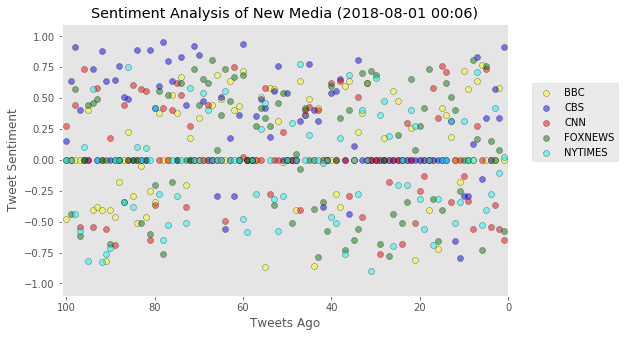

In [41]:
# Build the scatter plots for each news organization

# get x-axis list for BBC
x_axis_BBC     = BBC_sorted_df.loc[ : , "tweetsAgo"].tolist()
x_axis_CBS     = CBS_sorted_df.loc[ : , "tweetsAgo"].tolist()
x_axis_CNN     = CNN_sorted_df.loc[ : , "tweetsAgo"].tolist()
x_axis_FOXNEWS = FOXNEWS_sorted_df.loc[ : , "tweetsAgo"].tolist()
x_axis_NYTIMES = NYTIMES_sorted_df.loc[ : , "tweetsAgo"].tolist()


# get y-axis list for BBC
y_axis_BBC = BBC_sorted_df.loc[ : , "compoundScore"].tolist()
y_axis_CBS = CBS_sorted_df.loc[ : , "compoundScore"].tolist()
y_axis_CNN = CNN_sorted_df.loc[ : , "compoundScore"].tolist()
y_axis_FOXNEWS = FOXNEWS_sorted_df.loc[ : , "compoundScore"].tolist()
y_axis_NYTIMES = NYTIMES_sorted_df.loc[ : , "compoundScore"].tolist()

# Build the scatter plots for each News Organization
plt.figure(figsize=(8,5))
plt.scatter(x_axis_BBC, y_axis_BBC, marker="o",facecolors="yellow", edgecolors="black",
            alpha=0.5, label="BBC")

plt.scatter(x_axis_CBS, y_axis_CBS, marker="o",facecolors="blue", edgecolors="black",
            alpha=0.5, label="CBS")

plt.scatter(x_axis_CNN, y_axis_CNN, marker="o",facecolors="red", edgecolors="black",
            alpha=0.5, label="CNN")

plt.scatter(x_axis_FOXNEWS, y_axis_FOXNEWS, marker="o",facecolors="green", edgecolors="black",
            alpha=0.5, label="FOXNEWS")

plt.scatter(x_axis_NYTIMES, y_axis_NYTIMES, marker="o",facecolors="cyan", edgecolors="black",
            alpha=0.5, label="NYTIMES")

plt.xlim(101, 0)
plt.ylim(-1.1, 1.1)

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.title("Sentiment Analysis of New Media (" + str(now) + ")")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Sentiment")


lgnd = plt.legend(loc= 'upper center', scatterpoints=1, fontsize=10, bbox_to_anchor=(1.15, 0.8))
#lgnd = plt.legend(loc= 'upper center', scatterpoints=1, fontsize=10, bbox_to_anchor=(2.20, 0.8))

plt.grid()
plt.savefig("Images/SentimentAnalysis.png", bbox_inches = "tight")

plt.show()

In [42]:
# Export file as a CSV, without the Pandas index, but with the header
tweetSentiment_df.to_csv("TweetSentiment.csv", index=False, header=True)

In [43]:
# bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization
BBC_Avg_Sentiment = BBC_sorted_df["compoundScore"].mean()
CBS_Avg_Sentiment = CBS_sorted_df["compoundScore"].mean()
CNN_Avg_Sentiment = CNN_sorted_df["compoundScore"].mean()
FOXNEWS_Avg_Sentiment = FOXNEWS_sorted_df["compoundScore"].mean()
NYTIMES_Avg_Sentiment = NYTIMES_sorted_df["compoundScore"].mean()

sentiments = [BBC_Avg_Sentiment, CBS_Avg_Sentiment, CNN_Avg_Sentiment, FOXNEWS_Avg_Sentiment, NYTIMES_Avg_Sentiment ]

# find max and min average sentiments to set y-axis values
max_sentiments = max(sentiments)
min_sentiments = min(sentiments)



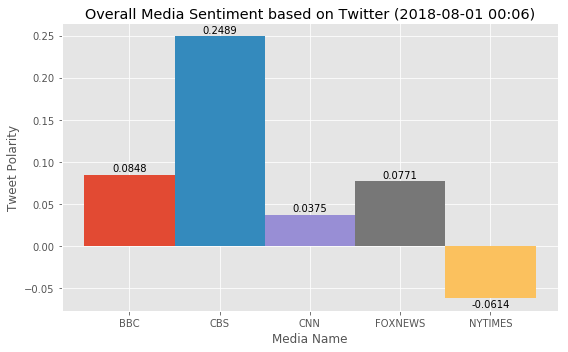

In [44]:
# set x and y axis
sentiments_series = pd.Series(sentiments)
x_axis = np.arange(len(target_user))

# Plot the figure.
plt.figure(figsize=(8, 5))
ax = sentiments_series.plot(kind='bar', width = 1)
ax.set_title('Overall Media Sentiment based on Twitter (' + str(now) + ')')
ax.set_xlabel('Media Name')
ax.set_ylabel('Tweet Polarity')
ax.set_xticklabels(target_user)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 1
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.4f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

#plt.savefig("image.png")
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
plt.tight_layout()
plt.savefig("Images/MediaSentiment.png")
plt.show()
